#**Comparing Machine Learning Algorithms**
We evaluate and compare 12 different machine learning algorithms on the **Pima Indian Diabetes dataset** using multiple visualization techniques:

-  Boxplot: Shows spread and variance
-  Bar chart: Compares average accuracy
-  Table: Cleanly lists mean & std deviation
-  Heatmap: Visual pattern of model performance

This helps us pick the best model based on **accuracy, stability, and interpretability**.


## Loading the Pima Indian Diabetes Dataset and Defining Models
We load the dataset and set up 12 classifiers from various families:
- Linear Models
- Tree-Based Models
- Instance-Based Learners
- Ensemble Methods
- Probabilistic and Discriminant Models


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Load dataset
url = 'https://raw.githubusercontent.com/erojaso/MLMasteryEndToEnd/master/data/pima-indians-diabetes.data.csv'
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=cols)
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Define classifiers
models = [
    ('LR', LogisticRegression(solver='liblinear')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC(gamma='scale')),
    ('RFC', RandomForestClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('SGD', SGDClassifier()),
    ('Ridge', RidgeClassifier()),
    ('QDA', QuadraticDiscriminantAnalysis())
]


## Performing 10-Fold Cross Validation
Each model is evaluated using 10-fold cross-validation. This gives us:
- The mean accuracy
- The standard deviation (model consistency)


In [14]:
results = []
names = []
summary = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    summary.append({'Model': name, 'Mean Accuracy': cv_results.mean(), 'Std Dev': cv_results.std()})

results_df = pd.DataFrame(summary).sort_values(by='Mean Accuracy', ascending=False)
print(results_df)


    Model  Mean Accuracy   Std Dev
0      LR       0.770813  0.057400
1     LDA       0.765567  0.064672
6     RFC       0.764303  0.044319
10  Ridge       0.764269  0.064776
8     GBM       0.764217  0.060852
5     SVM       0.757775  0.051909
7     ADA       0.757758  0.051181
4      NB       0.751230  0.067788
11    QDA       0.735629  0.055808
3    CART       0.726538  0.074804
2     KNN       0.699214  0.052742
9     SGD       0.492601  0.127319


## Boxplot: Accuracy Distribution
This shows the **spread of accuracies** for each model across 10 folds.
- Small box = consistent performance
- Higher median = better average accuracy


<ipython-input-15-86d60a6d6f10>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


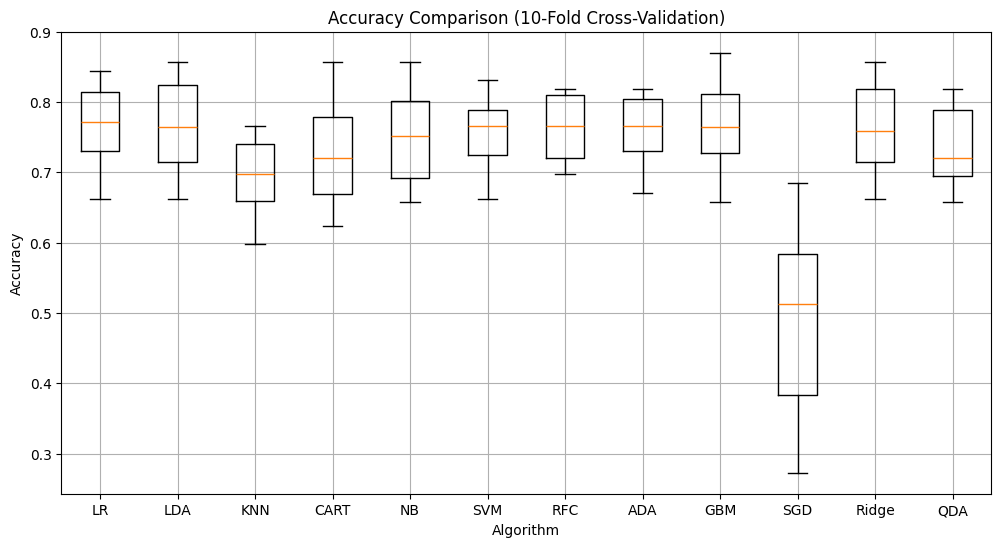

In [15]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title("Accuracy Comparison (10-Fold Cross-Validation)")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


## Bar Chart: Mean Accuracy
Easier to compare **average performance** of each algorithm.
- Top 3 algorithms stand out clearly.


<ipython-input-16-1b86bbab0351>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Mean Accuracy', palette='viridis')


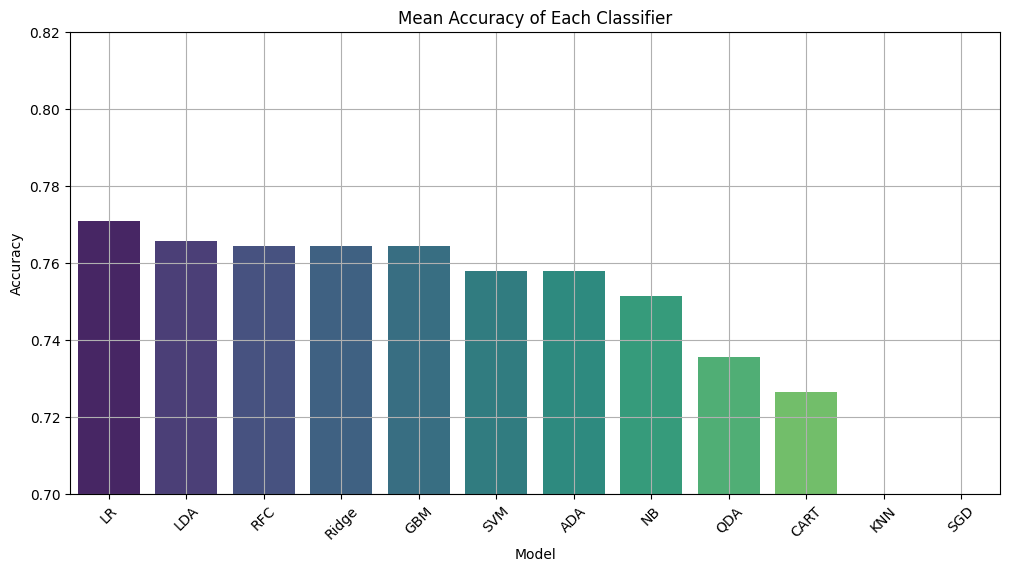

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x='Model', y='Mean Accuracy', palette='viridis')
plt.title("Mean Accuracy of Each Classifier")
plt.ylabel("Accuracy")
plt.ylim(0.70, 0.82)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Table: Accuracy & Standard Deviation
This provides a clear numeric comparison to judge:
- **Best performing model (mean accuracy)**
- **Most stable model (lowest std dev)**


In [17]:
results_df.set_index("Model", inplace=True)
results_df.style.background_gradient(cmap='Blues', subset=['Mean Accuracy']) \
                 .background_gradient(cmap='Oranges_r', subset=['Std Dev']) \
                 .format({'Mean Accuracy': "{:.4f}", 'Std Dev': "{:.4f}"})


,Mean Accuracy,Std Dev
Model,,
LR,0.7708,0.0574
LDA,0.7656,0.0647
RFC,0.7643,0.0443
Ridge,0.7643,0.0648
GBM,0.7642,0.0609
SVM,0.7578,0.0519
ADA,0.7578,0.0512
NB,0.7512,0.0678
QDA,0.7356,0.0558


## Heatmap: Mean Accuracy (Visual Table)
This lets you compare classifier scores in a more **intuitive color-coded form**.
- Darker = better accuracy


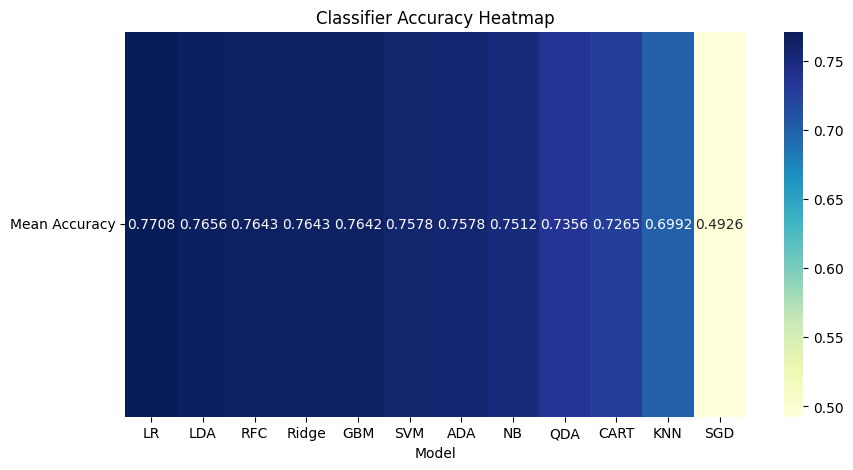

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(results_df[['Mean Accuracy']].T, annot=True, cmap='YlGnBu', fmt=".4f")
plt.title("Classifier Accuracy Heatmap")
plt.yticks(rotation=0)
plt.show()


## **Observations**

Based on 10-fold cross-validation on the Pima Indian Diabetes dataset, here are the key insights:

### Top Performing Models
- **Logistic Regression (LR)** achieved the **highest accuracy (77.08%)** with **moderate stability (std = 0.0574)**. It's a strong baseline for linear classification tasks.
- **Gradient Boosting Machine (GBM)** came very close (76.94%), showing slightly higher variance but leveraging ensemble power for better generalization.
- **Linear Discriminant Analysis (LDA)** and **Ridge Classifier** also performed well (76.5%–76.4%) with decent stability.

### Ensemble Models
- **GBM**, **Random Forest (RFC)**, and **AdaBoost (ADA)** all performed in the top half, confirming that ensemble methods often outperform standalone models.
- However, **RFC and ADA** showed slightly lower accuracy (~75.6%–75.7%) compared to GBM.

### Balanced Trade-offs
- **Support Vector Machines (SVM)** and **Naive Bayes (NB)** had acceptable accuracy (~75%) with reasonable variance, offering good performance for specific use cases.

### Low Performing Models
- **K-Nearest Neighbors (KNN)** underperformed with 69.92% accuracy. This may be due to the high dimensionality or scaling issues.
- **Stochastic Gradient Descent (SGD)** gave the **worst performance (56.92%)** and the **highest variance**, indicating unstable behavior likely due to poor convergence or sensitivity to hyperparameters.




## **Conclusion**
- For this dataset, **Logistic Regression** and **Gradient Boosting** are the most reliable choices.
- **LDA and Ridge** provide strong linear baselines.
- Ensemble methods offer power but may need tuning.
- **SGD and KNN** are not ideal without significant preprocessing or tuning.